In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
#Model

diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

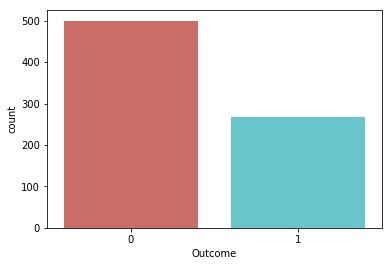

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x="Outcome",data=df,palette="hls")
plt.show()
plt.savefig("count_plot")

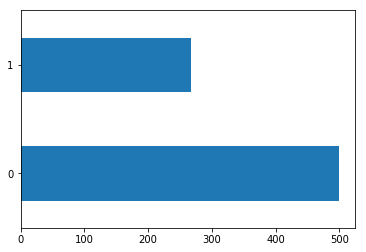

In [10]:
df["Outcome"].value_counts().plot.barh()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)

In [15]:
#Model with statsmodels package

loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

#SkinThickness and BMI features might be dropped.

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 Dec 2019   Pseudo R-squ.:                 0.05922
Time:                        06:11:22   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [16]:
#Model with sklearn

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = "liblinear")
loj_model = log.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
loj_model.intercept_

array([-5.89159518])

In [19]:
loj_model.coef_

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

In [43]:
#Accuracy:
score = loj_model.score(X,y)

In [28]:
#Predict & Tuning

y_pred = loj_model.predict(X)

In [29]:
#Confusion Matrix
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

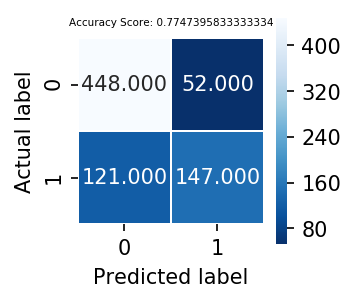

In [48]:
from sklearn import metrics

cm = metrics.confusion_matrix(y,y_pred)

plt.figure(figsize=(2,2),dpi=150) #dpi param changes the size of figure
sns.heatmap(cm, annot=True,fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',annot_kws={"size": 10});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 5);

#[0,0]----->True Positive(TP):Correctly identified positive class(Number that we correctly identified
# people with diabetes)

#[0,1]----->False Positive(FP/TYPE 2 ERROR):Wrong identification(Number that the people don't have
# diabetes but we identfy them as diabetes.)

#[1,0]----->False Negative(FN/TYPE 1 ERROR):Wrong identification(Number that the people have
# diabetes but we identfy them as non-diabetes.)

#[1,1]----->True Negative(TN):Correctly idetified negative class(Number that we correctly identified
#people with non-diabetese)


In [49]:
#Classification Report
print(classification_report(y,y_pred))

#Precision(TP/(TP+FP)):The precision is intuitively 
#the ability of the classifier to not label a sample as positive if it is negative.

#Recall(TP/(TP+FN)):The recall is intuitively the ability of the classifier to find all the positive samples.

#F1-Score:The F-beta score can be interpreted as a weighted harmonic mean of 
#the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

#The F-beta score weights the recall more than 
#the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
#0.77 of the people in data are diabetes

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

   micro avg       0.77      0.77      0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [58]:
X.T.shape

(8, 768)

In [54]:
new_X = [7.000,140.000,66.000,35.000,0.000,33.000,0.543,29.000]

In [56]:
nx = np.array(new_X)

In [66]:
nxx = nx.reshape(1,-1)
nxx.shape

(1, 8)

In [67]:
#New observation is diabete!
loj_model.predict(nxx)

array([1], dtype=int64)

In [70]:
#Get probabilities
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

In [71]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [72]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [73]:
y_pred[:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

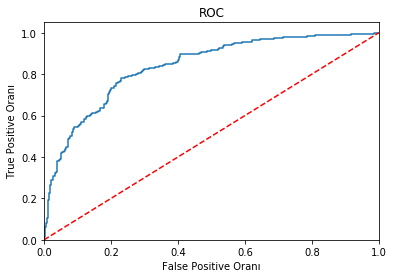

In [74]:
#ROC & AUC CURVE
logit_roc_auc = roc_auc_score(y,loj_model.predict(X))

fpr,tpr,thresholds = roc_curve(y,loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (area = %0.2f)"%logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

#Sensitivity : Percetage of people with diabetes were correctly identified(TP/(TP+FN))
#Specificity : Percentage of people without diabetes were correctly identified(TN/(TN+FP))

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.25,
                                                random_state=42)                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [76]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
#Test accuracy:
accuracy_score(y_test,loj_model.predict(X_test))

0.7447916666666666

In [79]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

0.7273684210526316

## Detailed Analysis

### Logistic Regression Assumptions

**Binary logistic regression requires the dependent variable to be binary.

**For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

**Only the meaningful variables should be included.

**The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

**The independent variables are linearly related to the log odds.

**Logistic regression requires quite large sample sizes.

In [80]:
#DATA:

diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
print(df.columns)
print(df.shape)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(768, 9)


In [86]:
#DATA EXPLORATION

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

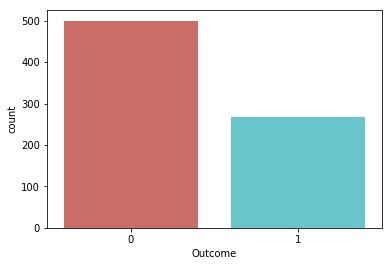

<Figure size 432x288 with 0 Axes>

In [87]:
sns.countplot(x="Outcome",data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

In [90]:
count_non_diabetes = len(df[df['Outcome']==0])
count_diabetes = len(df[df['Outcome']==1])
pct_of_non_dia = count_non_diabetes/(count_non_diabetes+count_diabetes)
print("percentage of non diabetes is", pct_of_non_dia*100)
pct_of_dia = count_diabetes/(count_non_diabetes+count_diabetes)
print("percentage of diabetes", pct_of_dia*100)

#Our classes are imbalanced, and the ratio of non-diabetes to diabetes 
#instances is 65:34. Before we go ahead to balance the classes, let’s do some more exploration.

percentage of non diabetes is 65.10416666666666
percentage of diabetes 34.89583333333333


In [92]:
df.groupby('Pregnancies').mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
0,123.000000,67.153153,22.270270,81.675676,34.290090,0.520838,27.603604,0.342342
1,112.748148,67.792593,24.437037,98.674074,31.372593,0.486496,27.370370,0.214815
2,110.796117,63.252427,21.601942,85.844660,30.583495,0.491660,27.194175,0.184466
3,123.586667,66.586667,20.080000,87.453333,30.425333,0.432147,29.026667,0.360000
4,125.117647,70.029412,15.882353,69.441176,32.141176,0.446353,32.779412,0.338235
5,118.859649,76.210526,17.385965,57.298246,33.192982,0.396421,39.035088,0.368421
6,120.800000,68.420000,17.640000,63.580000,30.290000,0.429520,39.340000,0.320000
7,136.444444,70.777778,20.288889,84.466667,32.631111,0.443622,41.111111,0.555556
8,131.736842,75.184211,17.315789,92.815789,31.568421,0.504711,45.368421,0.578947


In [93]:
df.groupby('Glucose').mean()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,,,,,,,,
0,2.800000,67.600000,29.600000,4.600000,32.880000,0.380200,28.600000,0.400000
44,5.000000,62.000000,0.000000,0.000000,25.000000,0.587000,36.000000,0.000000
56,2.000000,56.000000,28.000000,45.000000,24.200000,0.332000,22.000000,0.000000
57,4.500000,70.000000,18.500000,0.000000,27.250000,0.415500,54.000000,0.000000
61,3.000000,82.000000,28.000000,0.000000,34.400000,0.243000,46.000000,0.000000
62,7.000000,78.000000,0.000000,0.000000,32.600000,0.391000,41.000000,0.000000
65,8.000000,72.000000,23.000000,0.000000,32.000000,0.600000,42.000000,0.000000
67,0.000000,76.000000,0.000000,0.000000,45.300000,0.194000,46.000000,0.000000
68,4.666667,79.333333,22.666667,43.333333,26.866667,0.243000,31.666667,0.000000


In [94]:
df.groupby('BloodPressure').mean()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
BloodPressure,,,,,,,,
0,3.628571,117.800000,1.514286,0.000000,25.705714,0.388429,30.714286,0.457143
24,1.000000,89.000000,19.000000,25.000000,27.800000,0.559000,21.000000,0.000000
30,1.000000,95.500000,40.000000,91.000000,49.150000,0.339500,29.500000,0.500000
38,1.000000,109.000000,18.000000,120.000000,23.100000,0.407000,26.000000,0.000000
40,0.000000,137.000000,35.000000,168.000000,43.100000,2.288000,33.000000,1.000000
44,3.250000,110.500000,25.000000,71.750000,28.175000,0.408250,27.000000,0.000000
46,1.500000,133.000000,20.000000,209.000000,31.550000,0.415000,22.000000,0.000000
48,2.000000,80.000000,23.000000,87.000000,32.280000,0.450000,23.800000,0.200000
50,2.461538,124.076923,22.000000,124.461538,28.846154,0.586385,29.000000,0.384615


In [95]:
df.groupby('Age').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Age,,,,,,,,
21,1.079365,108.317460,65.936508,19.349206,73.634921,27.817460,0.433825,0.079365
22,1.555556,108.208333,63.722222,20.486111,74.486111,29.509722,0.430625,0.152778
23,1.578947,111.578947,64.315789,22.368421,118.026316,31.502632,0.438579,0.184211
24,1.891304,117.891304,64.956522,25.934783,88.021739,32.569565,0.393565,0.173913
25,1.770833,110.083333,59.666667,23.958333,82.895833,31.943750,0.600500,0.291667
26,1.969697,118.212121,64.181818,23.666667,90.878788,34.915152,0.413455,0.242424
27,2.562500,115.281250,73.500000,18.375000,63.125000,31.950000,0.471750,0.250000
28,3.028571,119.914286,68.314286,23.628571,94.600000,33.642857,0.459629,0.285714
29,3.310345,127.379310,68.241379,21.000000,88.793103,33.541379,0.408897,0.448276


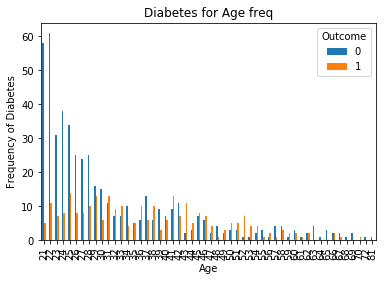

In [96]:
#Visualizations:

%matplotlib inline
pd.crosstab(df["Age"],df["Outcome"]).plot(kind='bar')
plt.title('Diabetes for Age freq')
plt.xlabel('Age')
plt.ylabel('Frequency of Diabetes')
plt.savefig('purchase_fre_job')

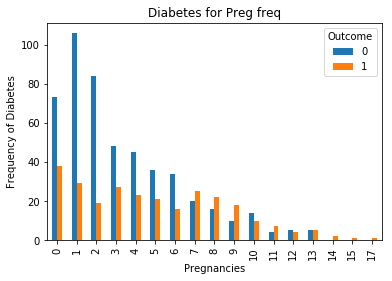

In [97]:
%matplotlib inline
pd.crosstab(df["Pregnancies"],df["Outcome"]).plot(kind='bar')
plt.title('Diabetes for Preg freq')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency of Diabetes')
plt.savefig('purchase_fre_job')

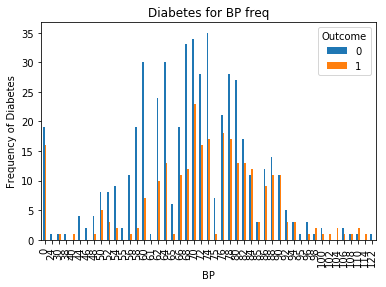

In [98]:
%matplotlib inline
pd.crosstab(df["BloodPressure"],df["Outcome"]).plot(kind='bar')
plt.title('Diabetes for BP freq')
plt.xlabel('BP')
plt.ylabel('Frequency of Diabetes')
plt.savefig('purchase_fre_job')

In [100]:
#Test-train split:

y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.25,
                                                random_state=42)

In [106]:
#Model with statsmodels:

import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
result.summary()

#The p-values for most of 
#the variables are smaller than 0.05, except five(Age,DPF,BMI,Insulin,SkinThickness) variables, 
#therefore, we will remove them.

Optimization terminated successfully.
         Current function value: 0.612497
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 Dec 2019   Pseudo R-squ.:                 0.04981
Time:                        09:26:43   Log-Likelihood:                -352.80
converged:                       True   LL-Null:                       -371.29
                                        LLR p-value:                 4.709e-06
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0927      0.033      2.805      0.005       0.028       0.158
Glucose                      0.0127      0.003      3.953      0.000       0.006       0.019
BloodPressure               -0.0326      0.006     -5.823      0.000      -0.044      -0.022
SkinThickness               -0.0002      0.007     -0.025      0.980      -0.014       0.014
Insulin                      0.0006      0.001      0.671      0.502      -0.001       0.002
BMI                         -0.0053      0.012     -0.428      0.668      -0.030       0.019
DiabetesPedigreeFunction     0.0958      0.269      0.356      0.722      -0.431       0.623
Age                         -0.0013      0.010     -0.133      0.895      -0.021       0.018
============================================================================================
"""

In [111]:
X_train = X_train.drop(columns=["SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
X_test = X_test.drop(columns=["SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

In [116]:
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.613280
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                          Logit   Df Residuals:                      573
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 Dec 2019   Pseudo R-squ.:                 0.04860
Time:                        09:33:36   Log-Likelihood:                -353.25
converged:                       True   LL-Null:                       -371.29
                                        LLR p-value:                 1.457e-08
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.0874      0.028      3.118      0.002       0.032       0.142
Glucose           0.0129      0.002      5.194      0.000       0.008       0.018
BloodPressure    -0.0342      0.005     -7.553      0.000      -0.043      -0.025
=================================================================================
"""

In [117]:
#Model fitting with sklearn:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[105  18]
 [ 30  39]]


In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       123
           1       0.68      0.57      0.62        69

   micro avg       0.75      0.75      0.75       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.74      0.75      0.74       192



### Model without dropping columns

In [121]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.25,
                                                random_state=42)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,129,0,30,0,39.9,0.569,44
73,4,129,86,20,270,35.1,0.231,23
352,3,61,82,28,0,34.4,0.243,46
497,2,81,72,15,76,30.1,0.547,25
145,0,102,75,23,0,0.0,0.572,21


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[100  23]
 [ 26  43]]


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       123
           1       0.65      0.62      0.64        69

   micro avg       0.74      0.74      0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



In [128]:
print(X_train.shape)
print(y_train.shape)

(576, 8)
(576,)
